                 id    period  treatment        x1        x2        x3  \
id         1.000000  0.024945  -0.031034  0.027401 -0.019298 -0.015944   
period     0.024945  1.000000  -0.160336  0.038273 -0.058948 -0.044744   
treatment -0.031034 -0.160336   1.000000  0.053655  0.120555  0.021803   
x1         0.027401  0.038273   0.053655  1.000000  0.072324 -0.034552   
x2        -0.019298 -0.058948   0.120555  0.072324  1.000000 -0.067664   
x3        -0.015944 -0.044744   0.021803 -0.034552 -0.067664  1.000000   
x4        -0.047173 -0.143004   0.431029 -0.113441 -0.039730  0.189442   
age        0.066729  0.569833  -0.236510  0.040720  0.002637 -0.135130   
age_s      0.066729  0.569833  -0.236510  0.040720  0.002637 -0.135130   
outcome    0.042941 -0.014715  -0.048474 -0.010587  0.024623  0.037117   
censored  -0.010342 -0.228819   0.049726 -0.077869  0.122761  0.017903   
eligible   0.004708 -0.510754  -0.042344  0.060087  0.074121  0.079643   

                 x4       age     age

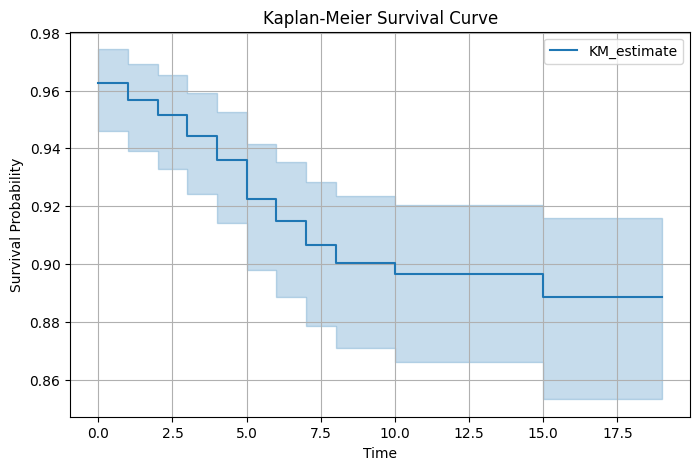

model,lifelines.CoxPHFitter
duration col,'period'
event col,'event'
penalizer,0.1
l1 ratio,0.0
robust variance,True
baseline estimation,breslow
number of observations,725
number of events observed,58
partial log-likelihood,-244.92
time fit was run,2025-03-08 19:11:07 UTC


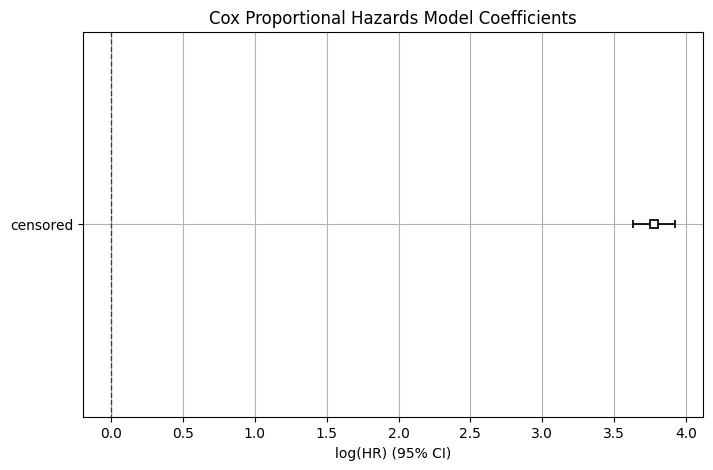

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("data_censored.csv")

# Define column names (ensure these match your dataset!)
duration_col = "period"  # Replace with actual time column name
event_col = "censored"   # Replace with actual event column (1=event occurred, 0=censored)

# Check column names
if duration_col not in df.columns or event_col not in df.columns:
    raise ValueError(f"ERROR: Column names are incorrect! Check: {df.columns}")

# Convert to numeric (if necessary)
df[duration_col] = pd.to_numeric(df[duration_col], errors="coerce")
df[event_col] = pd.to_numeric(df[event_col], errors="coerce")

# Standardize the data
scaler = StandardScaler()
df[df.columns.difference([duration_col, event_col])] = scaler.fit_transform(df[df.columns.difference([duration_col, event_col])])

# Check for multicollinearity
correlation_matrix = df.corr()
print(correlation_matrix)

# Remove highly correlated features
threshold = 0.9  # Set your threshold for high correlation
high_corr_vars = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > threshold) and column != duration_col and column != event_col]
df = df.drop(columns=high_corr_vars)

# Kaplan-Meier Survival Analysis
kmf = KaplanMeierFitter()
kmf.fit(df[duration_col], event_observed=df[event_col])

# Plot Kaplan-Meier curve
plt.figure(figsize=(8, 5))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.grid()
plt.show()

# Cox Proportional-Hazards Model
cph = CoxPHFitter(penalizer=0.1)
df["event"] = df[event_col]  # Ensure lifelines compatibility

# Fit Cox model
cph.fit(df, duration_col=duration_col, event_col="event", robust=True)

# Show summary
cph.print_summary()

# Plot Cox model survival function
plt.figure(figsize=(8, 5))
cph.plot()
plt.title("Cox Proportional Hazards Model Coefficients")
plt.grid()
plt.show()